[[266 465 388 379]]
-1.41860465116
[[272 459 378 385]]
-1.43243243243
[[649 481 715 487]]
[[428 467 488 469]]
[[647 479 668 479]]
[[472 470 509 472]]
[[680 473 692 473]]
[[744 468 761 479]]
744.0 761.0 468.0 479.0
1.54545454545
[[570 359 585 369]]
657.0 673.0 413.5 424.0
1.5
[[463 478 506 478]]
[[667 470 681 470]]
[[695 436 708 435]]
[[711 450 723 450]]
[[765 462 790 474]]
693.0 712.0 429.666666667 440.666666667
2.08333333333
[[390 455 400 456]]
[[471 325 539 325]]
[[425 443 448 443]]
[[622 448 651 446]]
[[426 461 445 462]]
[[581 474 598 474]]
[[600 435 614 433]]
[[464 477 504 477]]
[[434 453 444 454]]
[[744 466 757 466]]
[[453 483 483 482]]
[[475 331 493 331]]
[[609 437 625 435]]
[[553 469 591 468]]
[[651 478 667 478]]
[[462 467 487 468]]
[[690 482 705 482]]
[[553 467 577 467]]
[[700 447 721 447]]
[[425 463 444 464]]
[[363 465 401 463]]
[[648 477 660 477]]
[[504 483 517 483]]
[[649 476 659 476]]
[[359 475 390 475]]
[[624 447 647 444]]
[[390 451 410 451]]
[[463 467 485 463]]
[[693 488 

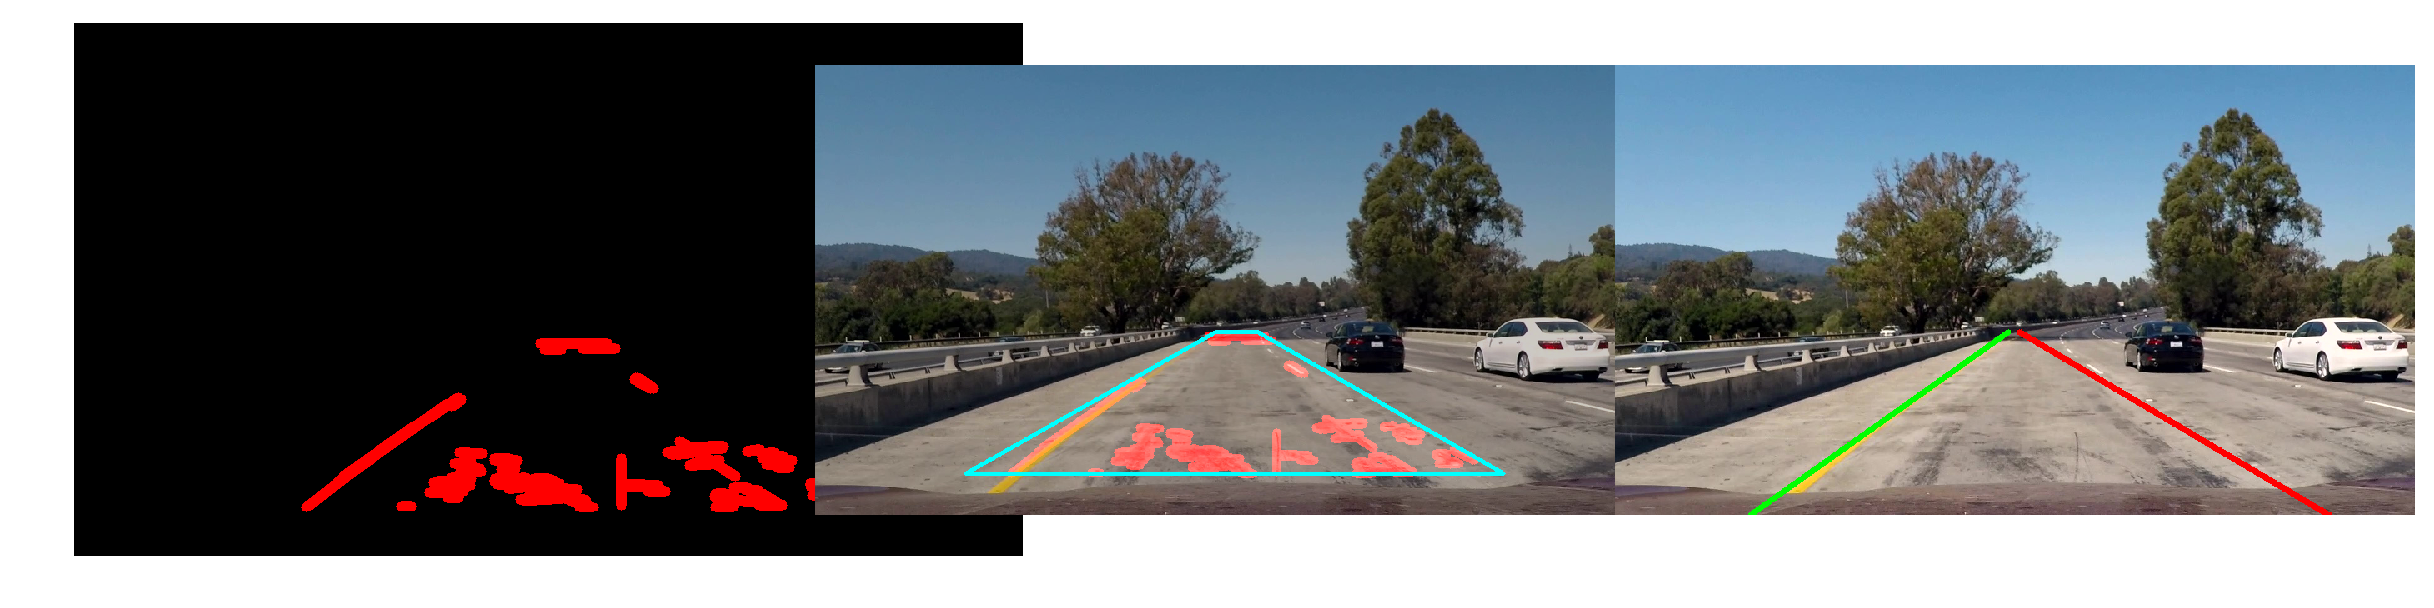

In [55]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# importing "array" for array operations 
import array

import os

image_list = os.listdir("test_images_challange/")
image_new_index = 0
figure_index = 1
lines_edges_array = [] 
image_new = []

fig=plt.figure(figsize=(20, 20), dpi=160)
for image in image_list:

    # Read in and grayscale the image
    image = mpimg.imread('./test_images/'+image)
    
    image = cv2.resize(image, dsize=(960,540), interpolation=cv2.INTER_CUBIC)

    #image = mpimg.imread('./test_images/solidWhiteRight.jpg')
    gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

    # Define a kernel size and apply Gaussian smoothing
    kernel_size = 3
    blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

    # Define our parameters for Canny and apply
    low_threshold = 40
    high_threshold = 150
    edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

    # Next we'll create a masked edges image using cv2.fillPoly()
    mask = np.zeros_like(edges)   
    ignore_mask_color = 255   

    # This time we are defining a four sided polygon to mask
    imshape = image.shape
    vertices = np.array([[(180,imshape[0]-50),(480, 320), (530,320), (825,imshape[0]-50)]], dtype=np.int32)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_edges = cv2.bitwise_and(edges, mask)

    # Define the Hough transform parameters
    # Make a blank the same size as our image to draw on
    rho = 1 # distance resolution in pixels of the Hough grid
    theta = np.pi/180 # angular resolution in radians of the Hough grid
    threshold = 30    # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 10 #minimum number of pixels making up a line
    max_line_gap = 10  # maximum gap in pixels between connectable line segments
    line_image = np.copy(image)*0 # creating a blank to draw lines on

    # Run Hough on edge detected image
    # Output "lines" is an array containing endpoints of detected line segments
    lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                                min_line_length, max_line_gap)

    # Iterate over the output "lines" and draw lines on a blank image
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

    # Create a "color" binary image to combine with line image
    color_edges = np.dstack((edges, edges, edges)) 

    # Draw the lines on the edge image
    lines_edges = cv2.addWeighted(image, 0.8, line_image, 1, 0) 
    lines_edges_array.append(cv2.polylines(lines_edges, [vertices], True, (0,255,255),4))
    
    #Column 1
    #fig.add_subplot(6, 4, figure_index)
    #plt.imshow(masked_edges)    
    #plt.axis('off')
    #figure_index +=1
    #Column 2
    fig.add_subplot(6, 3, figure_index)
    plt.imshow(line_image)
    plt.axis('off')
    figure_index +=1
    #Column 3
    fig.add_subplot(6, 4, figure_index)
    plt.imshow(lines_edges_array[image_new_index])
    plt.axis('off')
    #image_new.append(plt.imshow(lines_edges_array[image_new_index]))
    image_new_index +=1
    figure_index +=1
    #plt.imshow(masked_edges)
    
    #Column 4
    fig.add_subplot(6, 4, figure_index)
    #plt.imshow(image)
    
    ####################################################################3        
    x1AvgL = 0
    x2AvgL = 0
    y1AvgL = 0
    y2AvgL = 0
    x1AvgR = 0
    x2AvgR = 0
    y1AvgR = 0
    y2AvgR = 0
    nL = 1
    nR = 1

    for line in lines:
        print(line)
        for x1,y1,x2,y2 in line:
            if (y1!=y2):
                if ((x2-x1)/(y2-y1)) > 1 and ((x2-x1)/(y2-y1)) < 3 :
                    x1AvgL = x1AvgL + (x1 - x1AvgL)/nL
                    x2AvgL = x2AvgL + (x2 - x2AvgL)/nL
                    y1AvgL = y1AvgL + (y1 - y1AvgL)/nL
                    y2AvgL = y2AvgL + (y2 - y2AvgL)/nL
                    print(x1AvgL, x2AvgL, y1AvgL, y2AvgL)
                    print((x2-x1)/(y2-y1))
                    nL += 1
                elif ((x2-x1)/(y2-y1)) < -1 and ((x2-x1)/(y2-y1)) > -3  :
                    x1AvgR = x1AvgR + (x1 - x1AvgR)/nR
                    x2AvgR = x2AvgR + (x2 - x2AvgR)/nR
                    y1AvgR = y1AvgR + (y1 - y1AvgR)/nR
                    y2AvgR = y2AvgR + (y2 - y2AvgR)/nR
                    print((x2-x1)/(y2-y1))
                    nR += 1

    #print(x1AvgL, x2AvgL, y1AvgL, y2AvgL)

    #print(x1AvgR, x2AvgR, y1AvgR, y2AvgR)
    
    #print(nR)
    if (y1AvgL==0 and y2AvgL==0) or (y1AvgR==0 and y2AvgR==0):
        print(x1AvgL, x2AvgL, y1AvgL, y2AvgL)
        print(x1AvgR, x2AvgR, y1AvgR, y2AvgR)
    else:
        [slopeL, interceptL] = np.polyfit([x1AvgL, x2AvgL], [y1AvgL, y2AvgL], 1)
        [slopeR, interceptR] = np.polyfit([x1AvgR, x2AvgR], [y1AvgR, y2AvgR], 1)

        print(interceptL, slopeL)
        print(interceptR, slopeR)

        startYL = np.float32(320.0)
        endYL = np.float32(540.0)
        startXL = np.float32((startYL - interceptL) / slopeL)
        endXL = np.float32((endYL - interceptL) / slopeL)

        startYR = np.float32(320.0)
        endYR = np.float32(540.0)
        startXR = np.float32((startYR - interceptR) / slopeR)
        endXR = np.float32((endYR - interceptR) / slopeR)
        
        
        print(startXL, endXL, startYL, endYL)
        print(startXR, endXR, startYR, endYR)
    #plt.figure()

    #for line in lines:
         #for x1,y1,x2,y2 in line:
            #plt.plot([x1,x2], [y1,y2], 'ro')

    #ax = plt.gca()

    #plt.plot([x1AvgL, x2AvgL], [y1AvgL, y2AvgL])
    #plt.plot([startXL, endXL], [startYL, startYL])

    #plt.plot([x1AvgR, x2AvgR], [y1AvgR, y2AvgR])
    #plt.plot([startXR, endXR], [startYR, endYR])

    #plt.axis([0, 1500, 1500, 0])

    #plt.draw()
    #plt.show()
    
    ####################################################################3
        cv2.line(image, (startXL, startYL), (endXL, endYL), [255, 0, 0], 5)
        cv2.line(image, (startXR, startYR), (endXR, endYR), [0, 255, 0], 5)

        plt.imshow(image)

        plt.axis('off')
        figure_index +=1

plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
plt.show()

#http://ottonello.gitlab.io/selfdriving/nanodegree/python/line%20detection/2016/12/18/extrapolating_lines.html




#chk https://www.python-course.eu/matplotlib_multiple_figures.php   